### Project :1 Linear Regression model: Used Cars Sales Prediction

There is an automobile company XYZ from USA which aspires to enter the US used car market by setting up their company locally to give competition to their counterparts. They want to understand the factors affecting the pricing of cars in the market, since those may be vastly different from the new car market.
       
The market for used cars has witnessed a significant surge in demand in recent times, surpassing that of new cars. Consequently, pricing strategies for used vehicles have become crucial for businesses to remain competitive in the market. The value of a used car is influenced by a multitude of factors, such as mileage, model, and year of production. It is imperative for industry players to consider these variables while determining the actual worth of a used car.
      
First step document that lists the output of your exploratory analysis, any issues, or problems you may see with data that need follow-up, and some basic descriptive analysis that you think highlights important outcomes/findings from the data. Based on your findings, the next level of analysis will be charted out. Build a multiple linear regression model for predicting the price of a used car and provide meaningful inferences.


**Dataset: Used_cars_sales.xlsx**

**Data Dictionary**

    Name 	                 Name of the Car on Sell 
    City 	                 City of the Car on Sell 
    Years             	     Year of manufacture 
    Km_driven  	             Kms Car travelled 
    Fuel_Type  	             Petrol, Diesel, CNG 
    Transmission  	         Manual, Automatic 
    Owner_Type     	         First, Second, Third 
    Mileage  	             Mileage of the Car 
    Engine 	                 Engine Displacement 
    Power             	     Power of Engine 
    Seats              	     No. of Seats in Car 
    Selling_price   	     Selling price of a Car (Target)

**Initial Guidelines:**

1.	Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2.	Create GitHub account and submit the GitHub link.

### Software Engineering aspect:  

Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.

### General Instructions 

- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior 
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- Before submitting the assessment, there should be `no error` while executing the notebook. If there are any error causing code, please comment it.
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

#### **Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.**

### Loading required libraries and packages 

#### NOTE:
Import various libraries and modules used in data analysis, machine learning, and visualization tasks in Python such as `pandas`, `numpy`, `sklearn`, `matplotlib`, `seaborn`, `statsmodels`, `statsmodels.api`, `sklearn.model_selection`, `sklearn.linear_model`, `sklearn.metrics`, `sklearn.preprocessing`. There are 2 ways to import the libraries and modules:
* import numpy as np
* from sklearn.model_selection import train_test_split

In [1]:
# Required imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats
from scipy.stats import f_oneway,ttest_ind, chi2_contingency




### Task 1: Load the 'car_sales-dataset' available in the Dataset folder within the Project folder on the desktop. Perform preliminary EDA with key observations and insights- (weightage - 20 marks)

#### T1.1: Load the Used_cars_sales dataset using try and except blocks.          (weightage - 2 marks) (AE)        

#### NOTE:
- The `read_excel` method in Pandas allows you to read Excel files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

In [2]:
def load_the_dataset(dataset_location : str)->pd.DataFrame:
    car_sales = None
    # code starts here
    try:
        car_sales = pd.read_excel(dataset_location)
        print("dataset loaded successfully")
    except FileNotFoundError:
        return (f"Error : The file at path '{dataset_location}' was not found.")
    except pd.errors.EmptyDataError:
        return (f"Error : The file at path '{dataset_location}' is empty. ")
    except pd.errors.ParserError:
        return (f"Error : The file at path '{dataset_location}' could not be parsed.")
    except Exception as e:
        return (f"An unexpected error occurred: {e}")
               
    # code ends here
    return car_sales       

In [3]:
# store the result of the dataset
dataset_location = 'Used_cars_sales.xlsx'
car_sales=load_the_dataset(dataset_location)
print(car_sales)


dataset loaded successfully
      Sales_ID                          name  year  selling_price  km_driven  \
0            1        Maruti Swift Dzire VDI  2014         450000     145500   
1            2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2            3      Honda City 2017-2020 EXi  2006         158000     140000   
3            4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4            5        Maruti Swift VXI BSIII  2007         130000     120000   
...        ...                           ...   ...            ...        ...   
7901      8124             Hyundai i20 Magna  2013         320000     110000   
7902      8125         Hyundai Verna CRDi SX  2007         135000     119000   
7903      8126        Maruti Swift Dzire ZDi  2009         382000     120000   
7904      8127               Tata Indigo CR4  2013         290000      25000   
7905      8128               Tata Indigo CR4  2013         290000      25000   

        fue

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   name           7906 non-null   object
 2   year           7906 non-null   int64 
 3   selling_price  7906 non-null   int64 
 4   km_driven      7906 non-null   int64 
 5   fuel           7887 non-null   object
 6   seller_type    7890 non-null   object
 7   transmission   7906 non-null   object
 8   owner          7906 non-null   object
 9   mileage        7906 non-null   object
 10  engine         7906 non-null   object
 11  max_power      7906 non-null   object
 12  seats          7906 non-null   int64 
 13  City           7906 non-null   object
 14  Postal_code    7906 non-null   int64 
 15  Sales_status   7906 non-null   object
dtypes: int64(6), object(10)
memory usage: 988.4+ KB


In [5]:
car_sales.describe()

,Sales_ID,year,selling_price,km_driven,seats,Postal_code
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.496240e+05,6.918866e+04,5.416393,503806.024285
std,2345.770159,3.863695,8.115744e+05,5.679230e+04,0.959208,205061.544757
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,2.000000,110039.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,5.000000,391510.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,5.000000,524225.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,5.000000,680503.000000
max,8128.000000,2020.000000,8.500000e+06,2.360457e+06,14.000000,834008.000000


#### T1.2: Which brand is selling most?        (weightage - 2 marks)  (AE)             

**Hint: output should be the name of the brand only.**

#### NOTE:
To count each unique value in the 'name' column of the DataFrame car_sales we can use the value_counts() method. It returns a Series where the index contains unique car names, and the values represent the frequency of each name in the DataFrame.
To find the name of the car brand with the maximum count we can use the idxmax() method on the series. It returns the name of the most selling brand in the DataFrame.

In [6]:
def get_name_value_counts(car_sales):
    most_selling_brand = None
    #code starts here
    most_selling_brand = car_sales["name"].value_counts().idxmax()


    #code ends here
    return most_selling_brand

In [7]:
get_name_value_counts(car_sales)

'Maruti Swift Dzire VDI'

#### T1.3: Name the top 5 cities which has highest sales. (weightage - 2 marks)               (AE)
**Hint: Output should be city name only in the format of list**

#### NOTE:
To calculate the count of each unique value in the 'City' column of the DataFrame data use the value_counts() method. It will returns a Series where the index contains unique city names, and the values represent the frequency of each city in the DataFrame.
Now to select the top 5 cities with the highest sales count use the head() method on the Series. By default, head() returns the first 5 rows of the Series, which in this case, correspond to the cities with the highest sales.

In [8]:
def get_city_value_counts(data):
    city_with_max_sales = None
    #code starts here
    city_with_max_sales = data['City'].value_counts().head()
    
    #code ends here
    return city_with_max_sales.head()

In [9]:
# Remove 'name', 'count', and 'dtype' information   
city_name=get_city_value_counts(car_sales)
list(city_name.index)

['Delhi', 'Noida', 'Mumbai', 'Coimbatore', 'Vellore']

#### T1.4: Check missing values in the data in terms of percentage using error handling technique and do missing value treatment.  (weightage - 2 marks)       (AE) 

#### NOTE:
- Find the percentage of missing values in the data by dividing the total number of missing values by the total number of rows and multiplying by 100, you - will get the percentage of missing values for each column. 
Use `isnull().sum()` to calculate the total number of missing values in each column and `shape[0]` to get the total number of rows in the DataFrame.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

In [10]:
def missing_value_check(data):
    missing_percentage = None
    #code starts here
    missing_values = data.isnull().sum()
    #print(missing_values)
    total_rows = data.shape[0]
    #print(total_rows)
    
    missing_percentage = (missing_values/total_rows) *100


    #code ends here
    return missing_percentage

In [11]:
missing_value_check(car_sales)

Sales_ID         0.000000
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.240324
seller_type      0.202378
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           0.000000
max_power        0.000000
seats            0.000000
City             0.000000
Postal_code      0.000000
Sales_status     0.000000
dtype: float64

#### NOTE:
For treating the missing value first define the list of columns containing the names of the columns with missing values which will be treated. Iterating over each column name in the columns list fill the missing values in the dataset for that column with the mode value of that column. 

In [12]:
# Missing value treatment
def missing_value_treatment(car_sales):
    # Example: Replace missing values with mode value
    missing_values = car_sales.isnull().sum()
    missing_value_columns = missing_values[missing_values>0]
    #print(missing_value_columns)
    for col in car_sales.columns:
        if col in missing_value_columns:
            column_mode = car_sales[col].mode()[0]
            car_sales[col] = car_sales[col].fillna(column_mode)
            

        
    return car_sales

In [13]:
car_sales = missing_value_treatment(car_sales)
print(car_sales.isnull().sum()) 

Sales_ID         0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
City             0
Postal_code      0
Sales_status     0
dtype: int64


#### T1.5: Detect Outliers in the data and do outlier treatment. Plot a boxplot to visualize outliers in the data. (weightage – 2 marks) (ME)       
* The extreme values in selling_price due to genuine market conditions, such as luxury properties.Keep the values as it is.

#### NOTE:
The `sns.boxplot()` function in Seaborn is used to create a box plot visualization, which is a convenient way to visually summarize the distribution of numerical data and identify outliers. Using this detect the outliers in the `car_sales` dataframe. 

<AxesSubplot: >

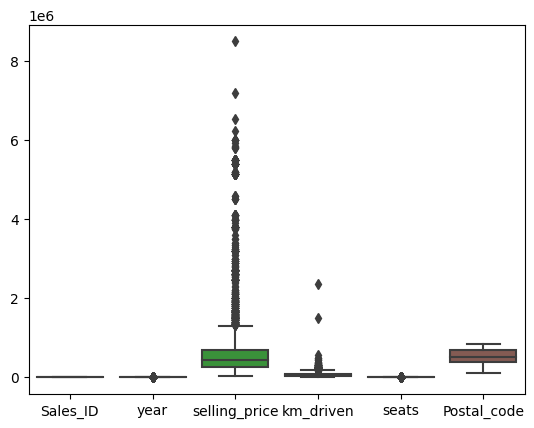

In [14]:
# plot a boxplot to visualize outliers in the data
sns.boxplot(car_sales)


#### Define a function `treat_outliers_iqr` to treat outliers using IQR method. Use `median` as treatment method.

#### NOTE:
The outliers in the dataset can be treated using the Interquartile Range (IQR) method. It replaces the outliers with either the median or the mean, based on the specified treatment method. Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) of the data along with the lower and upper bounds for outliers. Then replace the outliers with the median of the data.

In [15]:
# Define a function to detect and treat outliers using IQR method
def treat_outliers_iqr(data,treatment='median'):
    #code starts here
        
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    treat = data.median()
    data = data.apply(lambda x : treat if x<lower_bound or x>upper_bound else x)
    
    #code ends here
    return data

In [16]:
# Detect outliers and treat them with median value
numeric_columns=['km_driven']

In [17]:
# Display the treated DataFrame
for column in numeric_columns:
    car_sales[column] = treat_outliers_iqr(car_sales[column], treatment='median')

# Display the treated DataFrame
print(car_sales.head())

   Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000   145500.0   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000   120000.0   
2         3      Honda City 2017-2020 EXi  2006         158000   140000.0   
3         4     Hyundai i20 Sportz Diesel  2010         225000   127000.0   
4         5        Maruti Swift VXI BSIII  2007         130000   120000.0   

     fuel seller_type transmission         owner     mileage   engine  \
0  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1  Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC   
2  Petrol  Individual       Manual   Third Owner   17.7 kmpl  1497 CC   
3  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
4  Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC   

    max_power  seats      City  Postal_code Sales_status  
0      74 bhp      5    Mumbai       40

<AxesSubplot: >

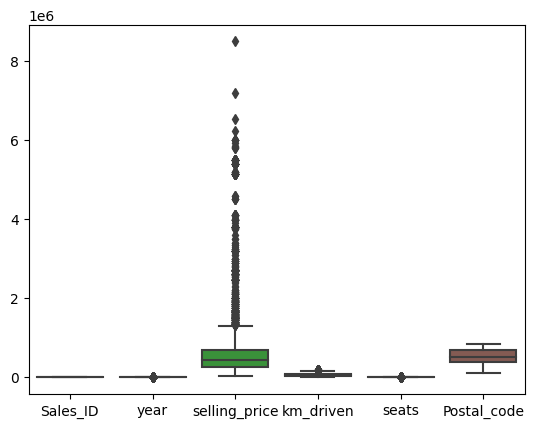

In [18]:
### Visualization -boxplot
sns.boxplot(car_sales)

#### T1.6: Which variables are significant in predicting the price of a used car? To answer this question, it is important to understand the correlation between the different variables. i.e how much the other features effect the selling price of a used car. (Bivariate analysis) (weightage - 3 marks)               (AE)

#### Cleaning the data

#### NOTE:
To understand the correlation between different variables , we have to convert the non numeric columns into numeric columns. Clean the data type of the 'max_power', 'engine', and 'mileage' columns in a DataFrame by converting them into numeric types by removing the units in order to perform correlation on them.

Removes the following non-numeric suffix using string manipulation functions:
* 'bhp' for max_power, 
* 'CC' for engine, 
* 'kmpl' or 'km/kg' for mileage

Converts the data type of each of the above column to float 

In [19]:
# define a function to convert data type of Max power, Engine and Mileage into numeric
def strip_spaces(value):
    return value.strip()
def retain_numeric(value):
    numeric_part = re.sub(r'[^0-9]','',value)
    return numeric_part

def clean_car_sales_data(df):
    #code starts here
    target_col = ["max_power","engine","mileage"]
    
    for col in target_col:
        df[col] = df[col].apply(strip_spaces)
        df[col] = df[col].apply(retain_numeric)
        df[col] = df[col].astype("float64")
        

    #code ends here
    return df

In [20]:
car_sales = clean_car_sales_data(car_sales)
print(car_sales)

      Sales_ID                          name  year  selling_price  km_driven  \
0            1        Maruti Swift Dzire VDI  2014         450000   145500.0   
1            2  Skoda Rapid 1.5 TDI Ambition  2014         370000   120000.0   
2            3      Honda City 2017-2020 EXi  2006         158000   140000.0   
3            4     Hyundai i20 Sportz Diesel  2010         225000   127000.0   
4            5        Maruti Swift VXI BSIII  2007         130000   120000.0   
...        ...                           ...   ...            ...        ...   
7901      8124             Hyundai i20 Magna  2013         320000   110000.0   
7902      8125         Hyundai Verna CRDi SX  2007         135000   119000.0   
7903      8126        Maruti Swift Dzire ZDi  2009         382000   120000.0   
7904      8127               Tata Indigo CR4  2013         290000    25000.0   
7905      8128               Tata Indigo CR4  2013         290000    25000.0   

        fuel seller_type transmission  

In [21]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   name           7906 non-null   object 
 2   year           7906 non-null   int64  
 3   selling_price  7906 non-null   int64  
 4   km_driven      7906 non-null   float64
 5   fuel           7906 non-null   object 
 6   seller_type    7906 non-null   object 
 7   transmission   7906 non-null   object 
 8   owner          7906 non-null   object 
 9   mileage        7906 non-null   float64
 10  engine         7906 non-null   float64
 11  max_power      7906 non-null   float64
 12  seats          7906 non-null   int64  
 13  City           7906 non-null   object 
 14  Postal_code    7906 non-null   int64  
 15  Sales_status   7906 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 988.4+ KB


#### Correlation between numerical variables and target variable

#### NOTE:
Using Python function `corr` compute the correlation matrix of a DataFrame df containing numeric columns.
Ensure that only numeric columns are included in the correlation computation.

In [22]:
def corr(df):
    correlation = None
    #code starts here
    new_df = df[["year","selling_price","km_driven","mileage","engine","max_power","seats"]]
    correlation_matrix = new_df.corr()
    plt.figure(figsize = (10,8))
    sns.heatmap(correlation_matrix,annot = True,cmap = "coolwarm", center = 0)
    plt.title("Correlation Matrix")
    plt.show()

    #code ends here
    return correlation

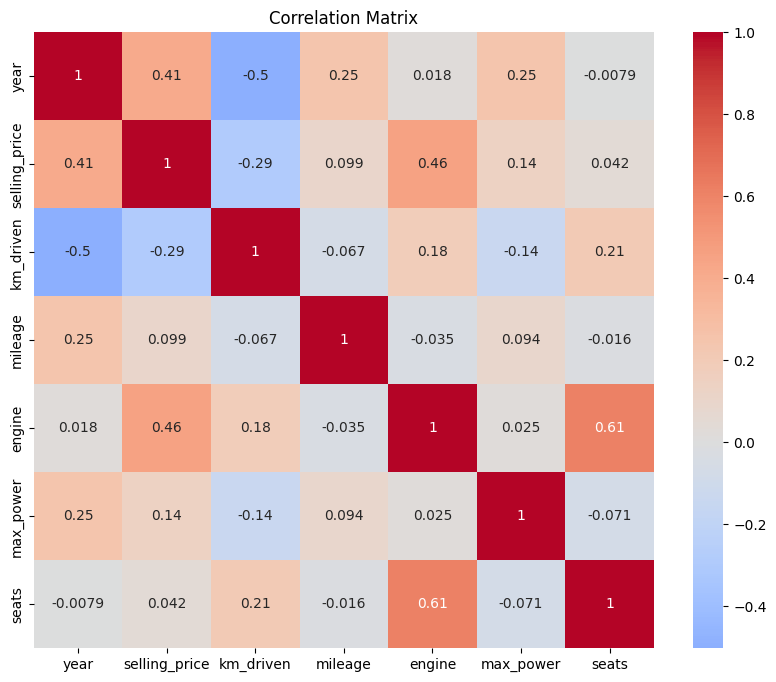

In [23]:
corr_data = corr(car_sales)
corr_data

#### T1.7: Come up with Insights and validate the hypothesis:                         (weightage: 3 marks)  (AE)

(i) Is there a statistically significant difference in the average mileage of cars across different fuel types and transmission types?

(ii) Is there a statistically significant difference in the selling prices of cars between individual and dealer sellers?

(iii)Is there a relationship between the type of fuel and transmission in cars?

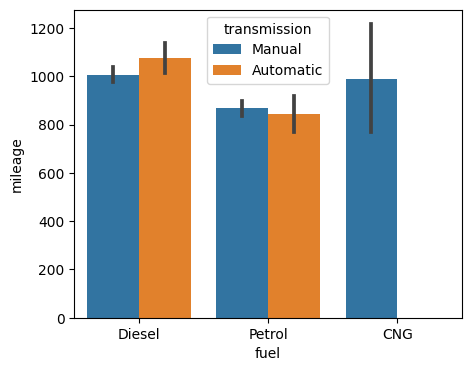

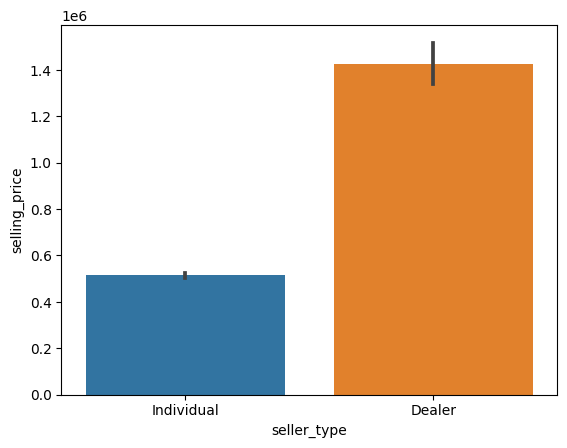

fuel          CNG  Diesel  Petrol
transmission                     
Automatic       0     532     509
Manual         87    3776    3002


In [24]:
plt.figure(figsize = (5,4))
sns.barplot(x = "fuel",y="mileage",hue = "transmission",data = car_sales)
plt.show()
sns.barplot(x = "seller_type",y = "selling_price",data=car_sales)
plt.show()
contingency_table = pd.crosstab(car_sales["transmission"],car_sales["fuel"])
print(contingency_table)

In [25]:
# As we can see , CNG has no automatic transmission otherwise the other fuels have almost same average mileage.
# Dealer generally sold cars at a higher price then individual sellers.
# The amount of automatic cars are still less compared to manual.

#### (i) Is there a statistically significant difference in the average mileage of cars across different fuel types and transmission types?

- If yes, set `result1` as "There is a significant difference in the average mileage of cars across different fuel types and transmission types"
- If no, set `result1` as "There is no significant difference in the average mileage of cars across different fuel types and transmission types"

#### NOTE:
Conduct an Analysis of Variance (ANOVA) test to determine if there is a significant difference in the average mileage of cars across different fuel types and transmission types.
* Groups the data to create separate groups for each category.
* Then perform the ANOVA test using the stats.f_oneway() function from the scipy.stats module.
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison, determine whether there is a significant difference in the average mileage of cars across different fuel types and transmission types.

In [26]:
import scipy.stats as stats
def perform_anova(car_data):
    result1 = None
    # Code starts here
    grp_manual_diesel = car_data[(car_data['fuel'] == "Diesel") & (car_data["transmission"] == "Manual")]["mileage"]
    grp_auto_diesel = car_data[(car_data['fuel'] == "Diesel") & (car_data["transmission"] == "Automatic")]["mileage"]
    grp_manual_petrol = car_data[(car_data['fuel'] == "Petrol") & (car_data["transmission"] == "Manual")]["mileage"]
    grp_auto_petrol = car_data[(car_data['fuel'] == "Petrol") & (car_data["transmission"] == "Automatic")]["mileage"]
    grp_manual_CNG = car_data[(car_data['fuel'] == "CNG") & (car_data["transmission"] == "Manual")]["mileage"]

    # Perform ANOVA
    f_statistics, p_value = f_oneway(grp_manual_diesel,grp_auto_diesel,grp_manual_petrol,grp_auto_petrol,grp_manual_CNG)
    
    
    # Compare p-value with significance level (e.g., 0.05)
    if p_value>=0.05:
        result1 = "There is no significant difference in the average mileage of cars across different fuel types and transmission types"
    else:
        result1 = "There is a significant difference in the average mileage of cars across different fuel types and transmission types"
    # Code ends here
    
    # Return ANOVA results
    return result1

In [27]:
# Call the function
perform_anova(car_sales)

'There is a significant difference in the average mileage of cars across different fuel types and transmission types'

#### (ii) Is there a statistically significant difference in the selling prices of cars between individual and dealer sellers?

- If yes,set `result2` as "There is a statistically significant difference in the selling prices of cars between individual and dealer sellers"
- If no, set `result2` as "There is no statistically significant difference in the selling prices of cars between individual and dealer sellers"

#### Note:
Conducts an independent two-sample t-test to determine if there is a statistically significant difference in the selling prices of cars between individual and dealer sellers.
* Filter the data based on the 'seller_type' column to separate the selling prices of cars sold by individual sellers and dealer sellers.
* Perform the independent two-sample t-test using the ttest_ind() function from the scipy.stats module. 
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison,determines whether there is a statistically significant difference in the selling prices of cars between individual and dealer sellers.

In [28]:
from scipy.stats import ttest_ind
def seller_type_influence_test(car_sales):
    result2 = None
    # Code starts here
    # Filter data based on seller type
    group_individual = car_sales[car_sales["seller_type"] == "Individual"]["selling_price"]
    group_dealer = car_sales[car_sales["seller_type"] == "Dealer"]["selling_price"]
 

    # Perform independent t-test
    t_stat, p_value = ttest_ind(group_individual, group_dealer)
    

    # Set significance level
    alpha = 0.05
    
    # Interpret the results
    if p_value <alpha:
        result2 = "There is a statistically significant difference in the selling prices of cars between individual and dealer sellers"
    else:
        result2 = "There is no statistically significant difference in the selling prices of cars between individual and dealer sellers"

    
    
    # Code ends here    
    return result2


In [29]:
seller_type_influence_test(car_sales)

'There is a statistically significant difference in the selling prices of cars between individual and dealer sellers'

#### (iii) Is there a relationship between the type of fuel and transmission in cars?

- If yes,set `result3` as "There is a statistically significant relationship between the type of fuel and transmission in cars"
- If no, set `result3` as "There is no statistically significant relationship between the type of fuel and transmission in cars"

#### NOTE:
Conduct a chi-square test of independence to determine if there is a statistically significant relationship between the type of fuel and transmission in cars.
* Creates a contingency table of observed frequencies using the pd.crosstab() function. 
* Perform the chi-square test of independence using the stats.chi2_contingency() function from the scipy.stats module. 
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison, determine whether there is a statistically significant relationship between the type of fuel and transmission in cars.

In [30]:
def chi_square_test(car_data):
    result3 = None
    # Create a contingency table of observed frequencies
    contingency_table = pd.crosstab(car_data["fuel"],car_data["transmission"])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Compare p-value with significance level (e.g., 0.05)
    
    if p<0.05:
        result3 = "There is a statistically significant relationship between the type of fuel and transmission in cars"
    else: 
        result3 = "There is no statistically significant relationship between the type of fuel and transmission in cars"
    
    # Return Chi-square statistic, p-value, and result
    return result3

In [31]:
# Call the function
chi_square_test(car_sales)

'There is a statistically significant relationship between the type of fuel and transmission in cars'

#### T1.8: Data Transformation:  remove the given variables for model building process ("name","Postal_code","Sales_ID"). Apply normalization technique (standard scaler). (weightage - 2 marks)        (AE)      

#### NOTE:
Drop the varaiables "name","Postal_code","Sales_ID" from the dataframe using the drop() function. 

In [32]:
# drop the given variables
def drop_var1(data):
    # Code starts here
    data = data.drop(["name","Postal_code","Sales_ID"], axis = 1)
    
    # Code ends here
    return data

In [33]:
car_sales = drop_var1(car_sales)

#### T1.9: Handling categorical features: Apply encoding technique to convert categorical variable into numerical. Use try and except blocks.  (weightage - 2 marks)    (AE)

#### NOTE:
scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?
Transform city variable to 4 categories such as `North_city, South_city, East_city and West_city` according to the below given list.

In [34]:
# Define regions
def city_region(sales_data):
    north_cities = ['Dehradun','Mumbai','Jaipur','Indore','Pune','Aurangabad', 'Delhi','Ludhiana', 'kanpur', 'Gangtok', 'Noida']
    south_cities = ['Chennai','Mysore', 'Bangalore', 'Nellore', 'Coimbatore','Mangalore','Hyderabad','Vellore','Thrissur']
    east_cities = ['Ranchi', 'Kolkata', 'Jamshedpur', 'Patna', 'Bhubaneshwar']
    west_cities = ['Ahmedabad','Kochi','Vadodara', 'Surat']

    # Transform the City variable to 4 categories
    
    dic = {}
    for city in north_cities:
        dic[city] = "North"
    for city in south_cities:
        dic[city] = "South"
    for city in east_cities:
        dic[city] = "East"
    for city in west_cities:
        dic[city] = "West"
    
    #print(dic)
        
    sales_data["region"] = sales_data["City"].map(dic)
    #sales_data = pd.get_dummies(sales_data, columns = ["region"], prefix = "Region")
    #sales_data.drop("region",axis = 1)
    
    
    


    # Print the updated DataFrame
    return sales_data

In [35]:
#apply city_region() in the original data
car_sales=city_region(car_sales)
car_sales

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Sales_status,region
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,234.0,1248.0,74.0,5,Mumbai,Y,North
1,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,2114.0,1498.0,10352.0,5,Ranchi,Y,East
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,177.0,1497.0,78.0,5,Noida,Y,North
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,230.0,1396.0,90.0,5,Dehradun,Y,North
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,161.0,1298.0,882.0,5,Chennai,Y,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000.0,Petrol,Individual,Manual,First Owner,185.0,1197.0,8285.0,5,Indore,N,North
7902,2007,135000,119000.0,Diesel,Individual,Manual,Third Owner,168.0,1493.0,110.0,5,Dehradun,N,North
7903,2009,382000,120000.0,Diesel,Individual,Manual,First Owner,193.0,1248.0,739.0,5,Kolkata,N,East
7904,2013,290000,25000.0,Diesel,Individual,Manual,First Owner,2357.0,1396.0,70.0,5,Vellore,N,South


- drop the City variable

In [36]:
def drop_var2(data):
    data.drop(['City'],axis=1, inplace=True)
    return data

In [37]:
car_sales = drop_var2(car_sales)

#### Encoding technique: convert other categorical variable into factor variable (0,1,2.. categories)

#### NOTE:
Encode categorical columns in a DataFrame using the `LabelEncoder` from scikit-learn.

In [38]:
from sklearn.preprocessing import LabelEncoder
def encode_categorical_columns(df):    
    df["region_label"]= LabelEncoder().fit_transform(df["region"])
    df["fuel"]= LabelEncoder().fit_transform(df["fuel"])
    df["seller_type"]= LabelEncoder().fit_transform(df["seller_type"])
    df["transmission"]= LabelEncoder().fit_transform(df["transmission"])
    df["owner"]= LabelEncoder().fit_transform(df["owner"])
    df["Sales_status"]= LabelEncoder().fit_transform(df["Sales_status"])
    return df

In [39]:
# apply it in the original data
car_sales=encode_categorical_columns(car_sales)
print(car_sales.head())

   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000   145500.0     1            1             1      0   
1  2014         370000   120000.0     1            1             1      1   
2  2006         158000   140000.0     2            1             1      2   
3  2010         225000   127000.0     1            1             1      0   
4  2007         130000   120000.0     2            1             1      0   

   mileage  engine  max_power  seats  Sales_status region  region_label  
0    234.0  1248.0       74.0      5             1  North             1  
1   2114.0  1498.0    10352.0      5             1   East             0  
2    177.0  1497.0       78.0      5             1  North             1  
3    230.0  1396.0       90.0      5             1  North             1  
4    161.0  1298.0      882.0      5             1  South             2  


In [40]:
# convert City_region variable to numeric datatype
def drop_var3(data):
    data.drop(['region'],axis=1, inplace=True)
    return data

In [41]:
car_sales = drop_var3(car_sales)
print(car_sales.head())

   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000   145500.0     1            1             1      0   
1  2014         370000   120000.0     1            1             1      1   
2  2006         158000   140000.0     2            1             1      2   
3  2010         225000   127000.0     1            1             1      0   
4  2007         130000   120000.0     2            1             1      0   

   mileage  engine  max_power  seats  Sales_status  region_label  
0    234.0  1248.0       74.0      5             1             1  
1   2114.0  1498.0    10352.0      5             1             0  
2    177.0  1497.0       78.0      5             1             1  
3    230.0  1396.0       90.0      5             1             1  
4    161.0  1298.0      882.0      5             1             2  


#### T1.10: Save the cleaned dataset (cleaned_car_sales.xlsx file) by setting the index=False in your GitHub repository for model building process. (This task is for maintaining the version control of datasets) (weightage - 1 mark)      (ME)        

#### Refer to the Github document from Lumen to create the repository and steps to commit 
#### Add your Github repository link below 

In [42]:
car_sales.to_excel("cleaned_data.xlsx",index = False)
#https://github.com/alakhara/Sandbox/raw/main/cleaned_data.xlsx



#### NOTE:
Save the DataFrame car_sales to an Excel file named __"cleaned_car_sales.xlsx"__ in the `Project` folder on the desktop without including the index column. 

In [43]:
# Save the cleaned data set
car_sales.to_excel("cleaned_car_sales.xlsx",index = False)

In [44]:
# save it in github repository
#https://github.com/alakhara/Sandbox/raw/main/cleaned_car_sales.xlsx

### Task 2: Build Multiple Linear regression model for predicting the price of a used car. (weightage - 30 marks)               

#### T2.1: Load the cleaned dataset and divide it into predictor and target values (X & y) (weightage – 2 marks) (AE)

In [45]:
# load the cleaned data
def load_the_cleaned_dataset(dataset_location):
        cleaned_car_sales = None
        # Code starts here
        dataset = pd.read_excel(dataset_location)
        cleaned_car_sales = dataset
        # Code ends here
        return cleaned_car_sales

In [46]:
dataset_location = 'cleaned_car_sales.xlsx'
cleaned_car_sales=load_the_cleaned_dataset(dataset_location)    
print(cleaned_car_sales)

      year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2014         450000     145500     1            1             1      0   
1     2014         370000     120000     1            1             1      1   
2     2006         158000     140000     2            1             1      2   
3     2010         225000     127000     1            1             1      0   
4     2007         130000     120000     2            1             1      0   
...    ...            ...        ...   ...          ...           ...    ...   
7901  2013         320000     110000     2            1             1      0   
7902  2007         135000     119000     1            1             1      2   
7903  2009         382000     120000     1            1             1      0   
7904  2013         290000      25000     1            1             1      0   
7905  2013         290000      25000     1            1             1      0   

      mileage  engine  max_power  seats

- Separate independent features and target variable

In [47]:
# Separate independent features and target variable
def separate_data_and_target(df):
    X, y = np.ndarray([]),np.ndarray([])
    #code starts here
    X = df.drop('selling_price',axis =1)
    y = df["selling_price"]
    #code ends here
    return X,y

In [48]:
# dependent : X, independent : y
X, y = separate_data_and_target(cleaned_car_sales)

In [49]:
print(X.head())

   year  km_driven  fuel  seller_type  transmission  owner  mileage  engine  \
0  2014     145500     1            1             1      0      234    1248   
1  2014     120000     1            1             1      1     2114    1498   
2  2006     140000     2            1             1      2      177    1497   
3  2010     127000     1            1             1      0      230    1396   
4  2007     120000     2            1             1      0      161    1298   

   max_power  seats  Sales_status  region_label  
0         74      5             1             1  
1      10352      5             1             0  
2         78      5             1             1  
3         90      5             1             1  
4        882      5             1             2  


In [50]:
print(y.head())

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          7906 non-null   int64
 1   km_driven     7906 non-null   int64
 2   fuel          7906 non-null   int64
 3   seller_type   7906 non-null   int64
 4   transmission  7906 non-null   int64
 5   owner         7906 non-null   int64
 6   mileage       7906 non-null   int64
 7   engine        7906 non-null   int64
 8   max_power     7906 non-null   int64
 9   seats         7906 non-null   int64
 10  Sales_status  7906 non-null   int64
 11  region_label  7906 non-null   int64
dtypes: int64(12)
memory usage: 741.3 KB


#### T2.2: Split the dataset into train and test in the ratio of 80:20 and apply the scaling technique -RobustScaler. (weightage – 4 marks) (AE)

#### NOTE:

Split the dataset into training and testing. Separate the dependent (data) and independent (target) columns/fields of the dataset and apply the scaling technique -RobustScaler.The requirement is to build a model that performs regression task.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

def split_into_train_and_test_normalize_features(X,y):
    #X_train, X_test,y_train,y_test = np.ndarray([]),np.ndarray([]),np.ndarray([]),np.ndarray([])
    # Splitting dataset to train and test sets 80% train and 20% test
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
    #sns.pairplot(X_train)
        
    #Normalizes selected features in a dataset 
    # Instantiate the RobustScaler
    
    scaler = RobustScaler()
    

    # Fit the scaler to the training data and transform it
    X_numeric = X_train.select_dtypes(include = ["number"]).columns
    
    X_nonnum = X_train.select_dtypes(exclude = ["number"]).columns
    
    
    #print(X_numeric)
    #print(X_nonnum)
    
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[X_numeric]),columns=X_numeric,index = X_train.index)
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[X_numeric]),columns = X_numeric , index = X_test.index)
     
    X_train = pd.concat([X_train_scaled,X_train[X_nonnum]],axis=1)
    X_test = pd.concat([X_test_scaled,X_test[X_nonnum]],axis = 1)
    
    

    # Transform the testing data using the same scaler
    
    y_train = pd.Series(scaler.fit_transform(scaler.fit_transform(y_train.values.reshape(-1,1))).flatten())
    y_test = pd.Series(scaler.fit_transform(scaler.fit_transform(y_test.values.reshape(-1,1))).flatten())
    
    #sns.pairplot(X_train)
   
    return X_train, X_test,y_train,y_test

In [53]:
# split into training and testing 
X_train, X_test,y_train,y_test=split_into_train_and_test_normalize_features(X,y)

scaled_cleaned_car_sales = pd.concat([pd.concat([X_train,y_train],axis=1),pd.concat([X_test,y_test],axis=1)],axis=0)

#### T2.3: Validate the assumptions of Linear regression model- Linearity, multicollinearity (weightage -6 marks)   (ME)

#### NOTE:
Use `pairplot`

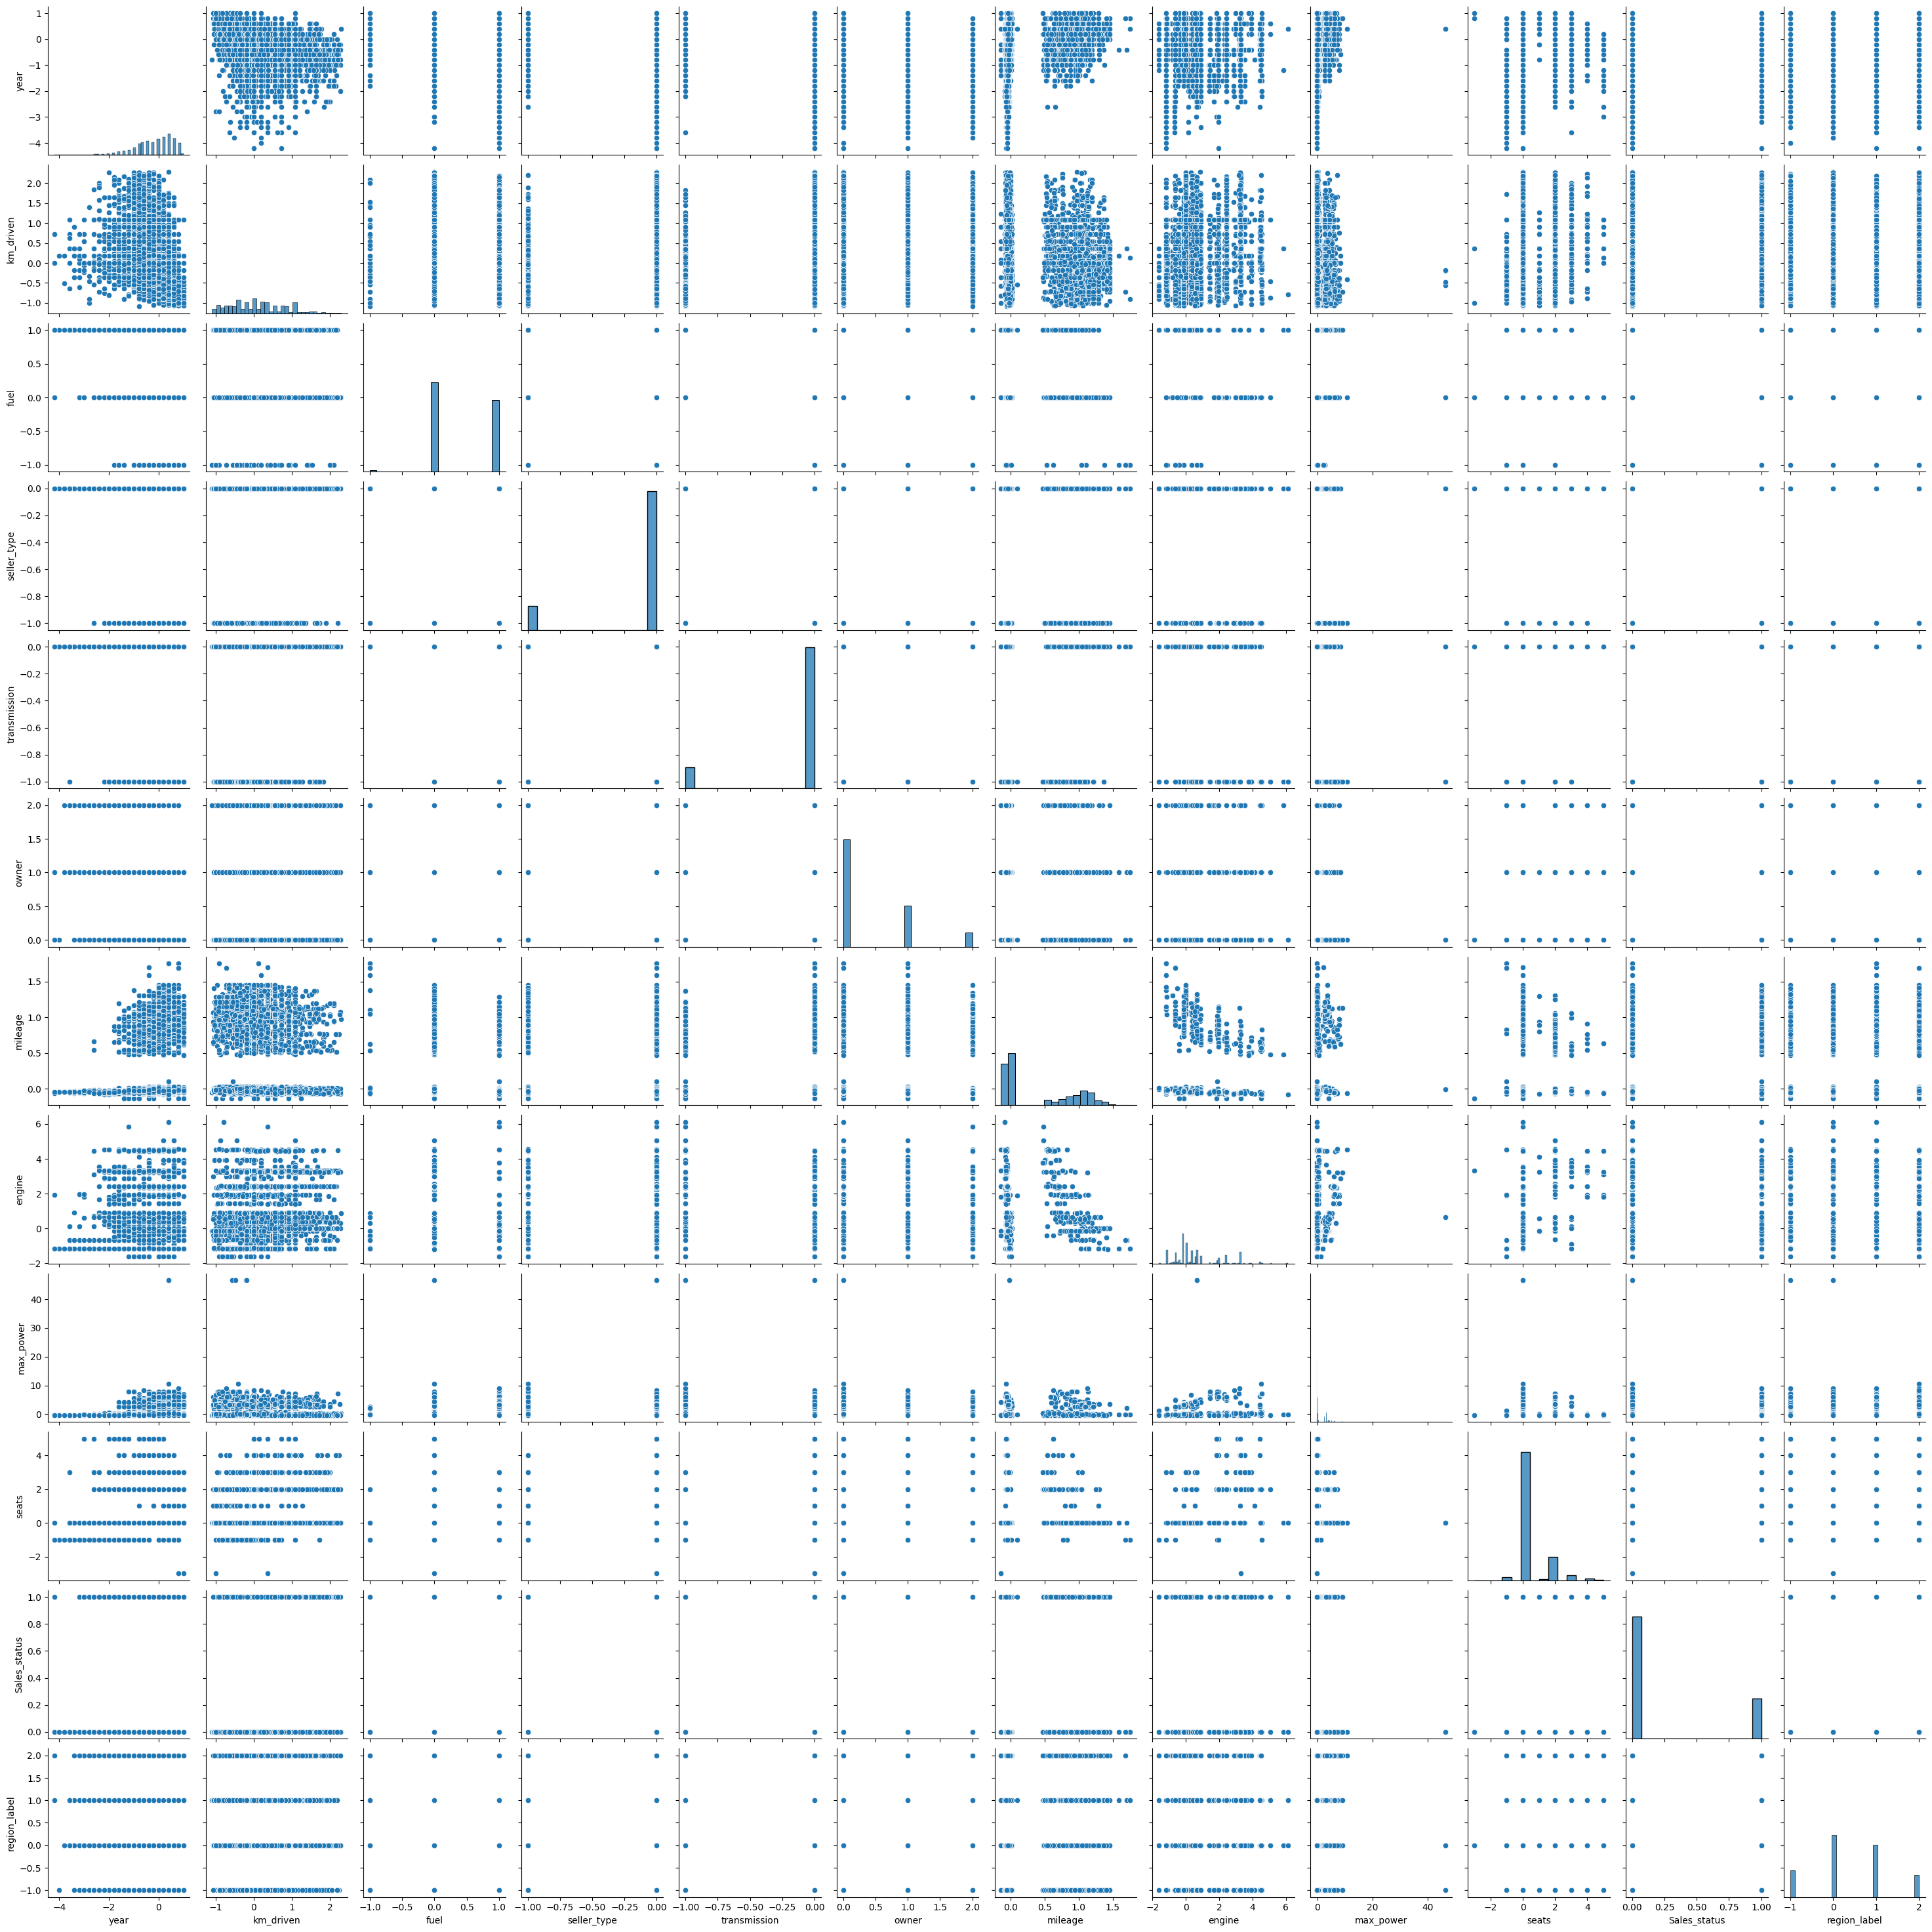

In [54]:
#Linearity
sns.pairplot(X_train)

In [55]:
cleaned_car_sales.columns


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Sales_status', 'region_label'],
      dtype='object')

##### Check the multicollinearity using VIF for all the variables in the model

#### NOTE:
* Splits the data into training and testing sets using the train_test_split function from scikit-learn. 
* Define the dependent variable (y1) and independent variables (X1) using the `dmatrices` function from the `patsy` module. 
* For each independent variable in X1, it calculates the VIF using the variance_inflation_factor function from the statsmodels.stats.outliers_influence module. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.
* Store the calculated VIF values along with the corresponding feature names in a DataFrame `vif` to display the VIF values for each feature.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

def multicollinearity(data):   
    train, test = train_test_split( data,test_size = 0.2,random_state = 1234 )
    
    formula = 'selling_price ~ year + km_driven + fuel + seller_type + transmission + owner + mileage + engine + max_power + seats + Sales_status + region_label'
    
    y,X = dmatrices(formula , data = data,return_type = "dataframe")
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    
    # For each X, calculate VIF and save in dataframe
    
    print(vif_data)
    
    return vif_data

In [57]:
 vif = multicollinearity(cleaned_car_sales)

         feature            VIF
0      Intercept  507710.219768
1           year       1.860373
2      km_driven       1.690193
3           fuel       1.470207
4    seller_type       1.212973
5   transmission       1.463685
6          owner       1.391964
7        mileage       1.084122
8         engine       2.343492
9      max_power       1.084979
10         seats       1.833618
11  Sales_status       1.004618
12  region_label       1.000996


#### T2.4: Build a multiple linear regression model on training data using OLS method and sklearn library . (weightage - 15 marks) (AE)

#### NOTE:
* Split the dataset into train and test in the ratio of 80:20.
* Set the random_state to 1234
* Build the OLS model using statsmodels formula API
* The function `fit_the_model_ols` should return the OLS Model and the test data.

**Build a model using OLS**

In [58]:
import statsmodels.formula.api as smf
def fit_the_model_ols(data):    
    ols_model = None
    train, test = np.ndarray([]),np.ndarray([])
    # Code starts here
    
    train_data,test_data = train_test_split(data,test_size = 0.2,random_state = 1234)
    
    # Building the OLS model using statsmodels formula API
    
    model = smf.ols(formula = 'selling_price ~ year + km_driven + fuel + seller_type + transmission + owner + mileage + engine + max_power + seats + Sales_status + region_label',data=train_data)
    ols_model = model.fit()
    test = test_data
    
    # Return the model and the test data    
    return ols_model,test

In [59]:
# Fit the model
ols_model, test_data = fit_the_model_ols(cleaned_car_sales)

In [60]:
# Get the summary of the fitted model
summary = ols_model.summary()
# Print the summary
print(summary)
print(ols_model)

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     736.4
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:43:04   Log-Likelihood:                -92273.
No. Observations:                6324   AIC:                         1.846e+05
Df Residuals:                    6311   BIC:                         1.847e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.176e+07   4.73e+06    -19.390   

**Build a linear model using sklearn library** 

#### NOTE:
* Initializes a linear regression model object.
* Fit the model to the training data (X_train and y_train) using the fit() method of the linear regression object. 

In [61]:
from sklearn.linear_model import LinearRegression
def fit_the_model_on_the_training_data(data,X_train:np.ndarray,y_train:np.ndarray):
    
    # Code starts here
    X = np.array(X_train)
    y = np.array(y_train)
    model = LinearRegression()
    regression = model.fit(X,y)
    
    
    # Code ends here 
    return regression

In [62]:
# train the training data 
sklearn_model=fit_the_model_on_the_training_data(cleaned_car_sales,X_train,y_train)

#### T2.5 Model Versioning:    (weightage -3 marks)  (ME)

Save the initial version of a linear regression model OLS codebase named 'first_model' to a version 
control system GitHub using git commands for facilitating collaboration, tracking 
changes, and ensuring transparency in model development.

Save the version of a linear regression model (sklearn) codebase named 'second_model' to a version control system GitHub using git commandsin git bash, if required facilitating collaboration, tracking changes, and ensuring transparency in model development.

#### Model Versioning: 

Save the above version of a linear regression model (sklearn) codebase named 'second_model' to a version control system GitHub using git commandsin git bash, if required facilitating collaboration, tracking changes, and ensuring transparency in model development.

In [63]:
import pickle
with open('first_model','wb') as file:
    pickle.dump(ols_model,file)
with open('second_model','wb') as file:
    pickle.dump(sklearn_model,file)

### Task 3: Evaluate the performance of the model using the right evaluation metrics. (weightage - 35 marks)


#### T3.1: Bring the initial version of a linear regression model 'first_model' and second version ‘second_model’ from a GitHub using git commands and evaluate the model (weightage - 2 marks) (ME)

#### Model Versioning:

Bring the initial version of a linear regression model 'first_model' from a GitHub using git commands and evaluate the model.

In [64]:
import requests
def load_model(url):
    response=requests.get(url)
    file_content=response.content
    data=pickle.loads(file_content)
    return data
model_1=load_model("https://github.com/alakhara/Sandbox/raw/main/first_model")


Bring the second version of a linear regression model sklearn 'second_model' from GitHub using git commands, and evaluate the model.

In [65]:
model_2=load_model("https://github.com/alakhara/Sandbox/raw/main/second_model")


#### T3.2: Evaluate the linear regression model with evaluation metrics R2 and RMSE using OLS and sklearn library. (weightage - 4 marks) (AE)

**Evaluate the OLS model**

#### NOTE
* Make the predictions on the test set using the provided OLS linear regression model 
* Calculate the RMSE by comparing the predicted selling prices with the actual selling prices in the test set, using the mean_squared_error function from scikit-learn.
* Calculate the R-squared (R²) value using the rsquared attribute of the linear regression model.
* Return both `RMSE` and `R²` value.

In [66]:
from sklearn.metrics import mean_squared_error,r2_score
def ols_calculate_rmse_r2(model, test_data):
    rmse,r_squared = 0.0,0.0
    # Making predictions on the test set
    
    rmse=mean_squared_error(ols_model.predict(test_data),test_data["selling_price"])
    r_squared=r2_score(test_data["selling_price"],ols_model.predict(test_data))
    
    # Calculating RMSE
    
    
    return rmse,r_squared

In [67]:
ols_rmse, ols_r_squared = ols_calculate_rmse_r2(ols_model, test_data)

In [68]:
# OLS Model RMSE value
print (ols_rmse)

253014178513.0444


In [69]:
# OLS R2 value
print (ols_r_squared)

0.6059215484657876


**Evaluate the Sklearn model**

#### NOTE:
* Make the predictions using a trained scikit-learn model (model) on a test dataset (X_test)
* Using the trained model predict the target variable for the provided test dataset (X_test) using the predict() method of the model.
* Return the predicted target variable values

In [70]:
def test_the_sklearn_model(model, X_test: np.ndarray) -> np.ndarray:
    y_prediction = np.ndarray([])
    # code starts here
    y_prediction=model.predict(X_test)
    # code ends here
    return y_prediction

In [71]:
y_pred=test_the_sklearn_model(sklearn_model,X_test)
y_pred

/home/labuser/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 0.65406939,  0.01061256, -0.69353774, ..., -0.03988671,
        4.42430935,  0.59261001])

**Evaluate the model with evaluation metric R2 and RMSE**

In [72]:
from sklearn.metrics import r2_score, mean_squared_error
def calculate_r_squared_sklearn(y_true, y_pred):
    """
    Calculate the R-squared (coefficient of determination) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        R-squared value.
    """
    r_squared = r2_score(y_true, y_pred)
     
    # Code starts here
  
    # Code ends here
    return r_squared

In [73]:
def calculate_rmse_sklearn(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        RMSE value.
    """
    rmse = mean_squared_error(y_true, y_pred)
    # Code starts here
   
    # Code ends here     
    return rmse

In [74]:
# Calculate R-squared
r_squared = calculate_r_squared_sklearn(y_test, y_pred)
print(r_squared)

0.6011928184055095


In [75]:
# Calculate RMSE
rmse = calculate_rmse_sklearn(y_test, y_pred)
print(rmse)

1.6904976059169607


#### T3.3:Remove the insignificant variables which identified by OLS and multicollinearity -VIF technique. Then apply log transformation on target variable and build the model using sklearn library. Save the version of this linear regression model named 'final_model' to a Github, and evaluate it with R2 and RMSE(weightage - 5 marks) (AE)

**Remove insignificant variable**
#### NOTE:
* Because of multicollinearity issue drop the variable engine
* Because of insignificance drop the variables - City_region, owner, Sales_status

In [76]:
def drop_variables(data):
    data.drop(columns=["owner", "Sales_status"])
    return data
cleaned_car_sales

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Sales_status,region_label
0,2014,450000,145500,1,1,1,0,234,1248,74,5,1,1
1,2014,370000,120000,1,1,1,1,2114,1498,10352,5,1,0
2,2006,158000,140000,2,1,1,2,177,1497,78,5,1,1
3,2010,225000,127000,1,1,1,0,230,1396,90,5,1,1
4,2007,130000,120000,2,1,1,0,161,1298,882,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,2,1,1,0,185,1197,8285,5,0,1
7902,2007,135000,119000,1,1,1,2,168,1493,110,5,0,1
7903,2009,382000,120000,1,1,1,0,193,1248,739,5,0,0
7904,2013,290000,25000,1,1,1,0,2357,1396,70,5,0,2


In [77]:
cleaned_car_sales=drop_variables(cleaned_car_sales)

**Apply Log transformation on target variable**

#### NOTE:
* Transform the target variable 'selling_price' into its natural logarithm ('ln_selling_price') using the numpy log function
* Return the ln_selling_price' column, which contains the transformed target variable values.

In [78]:
def target_transform(data):
    data["ln_selling_price"]=np.log(data["selling_price"])
    return data["ln_selling_price"]

In [79]:
target_transform(cleaned_car_sales)

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
7901    12.676076
7902    11.813030
7903    12.853176
7904    12.577636
7905    12.577636
Name: ln_selling_price, Length: 7906, dtype: float64

**Separate independent features and target variable**
#### NOTE:
* Extract the feature variables (X) by dropping the columns 'ln_selling_price' and 'selling_price' from the DataFrame df using the drop() method
* Extract the target variable (y) by selecting only the 'ln_selling_price' column from the DataFrame df.

In [80]:
def separate_data_and_target_new(df):
    X,y = np.ndarray([]),np.ndarray([])
    # Code starts here
    X = df.drop(["selling_price","ln_selling_price"],axis=1)
    y = df["ln_selling_price"]
    # Code ends here
    return X,y

In [81]:
X, y = separate_data_and_target_new(cleaned_car_sales)

In [82]:
# split into training and testing 
X_train, X_test,y_train,y_test=split_into_train_and_test_normalize_features(X,y)

In [83]:
final_model=fit_the_model_on_the_training_data(cleaned_car_sales,X_train,y_train)

#### Model Versioning: 

Save the above version of a linear regression model (sklearn) codebase named 'final_model' to a version control system GitHub using git commandsin git bash, if required facilitating collaboration, tracking changes, and ensuring transparency in model development.

In [84]:
with open('final_model','wb') as file:
    pickle.dump(final_model,file)

#### Model Versioning: 

Bring the above version of a linear regression model skelarn 'final_model' from GitHub using git commands, and evaluate the model.

In [85]:
final_model=load_model("https://github.com/alakhara/Sandbox/raw/main/final_model")

In [86]:
#Test the model on the testing dataset and return the predicted values for the test dataset
def test_the_finalmodel(model1, X_test): 
    y_prediction = np.ndarray([])
    # code starts here
    y_prediction=model1.predict(X_test)
    # code ends here
    return y_prediction

In [87]:
#prediction
y_pred_1=test_the_finalmodel(final_model, X_test)

/home/labuser/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [88]:
def calculate_r_squared_finalmodel(y_true, y_pred):
    """
    Calculate the R-squared (coefficient of determination) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        R-squared value.
    """
    r_squared = r2_score(y_true, y_pred)
    # Code starts here

    # Code ends here 
    return r_squared

In [89]:
def calculate_rmse_finalmodel(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    # Code starts here


    # Code ends here 
    
    return rmse

In [90]:
#r-squared
r_squared_final_model = calculate_r_squared_finalmodel(y_test, y_pred_1)
print(r_squared_final_model)

0.8014198040824054


In [91]:
#rmse
rmse_final_model = calculate_rmse_finalmodel(y_test, y_pred_1)
print(rmse_final_model)

0.15751723780227078


#### T3.4 Interpret R2 value and explain how one-unit change in mileage impacts the predicted sales price? (weightage - 3 marks) (ME)

- An R-squared (R2) value of 0.86 indicates that approximately 86% of the variance in the target variable
- The model is able to explain a large proportion of the variability in the sales prices of used cars based on the chosen features.
- R2 value of 0.86 indicates a strong relationship between the features and the sales prices of used cars, suggesting that the model has good predictive power.

In [92]:
# Get the coefficient for the 'km_driven' feature
def coefficient_km():
    km_driven_coefficient = None
    # Code starts here
    
    coefficient = final_model.coef_

    km_driven_coefficient = coefficient[1]
    # Code ends here
    
    return km_driven_coefficient

In [93]:
print(coefficient_km())

-0.08029707662277741


#### T3.5: Ensure residues are random i.e. normally distributed using histplot / QQ plot (weightage - 2 marks) (ME)
#### NOTE:
* Create a histogram plot of the residuals (the differences between the actual and predicted values of the target variable) using Seaborn's histplot function. 

In [94]:
def residual_plot(y_test, y_pred):
    plt.figure(figsize=(10,6))
    sns.histplot(y_test-y_pred,kde=True)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")

    return

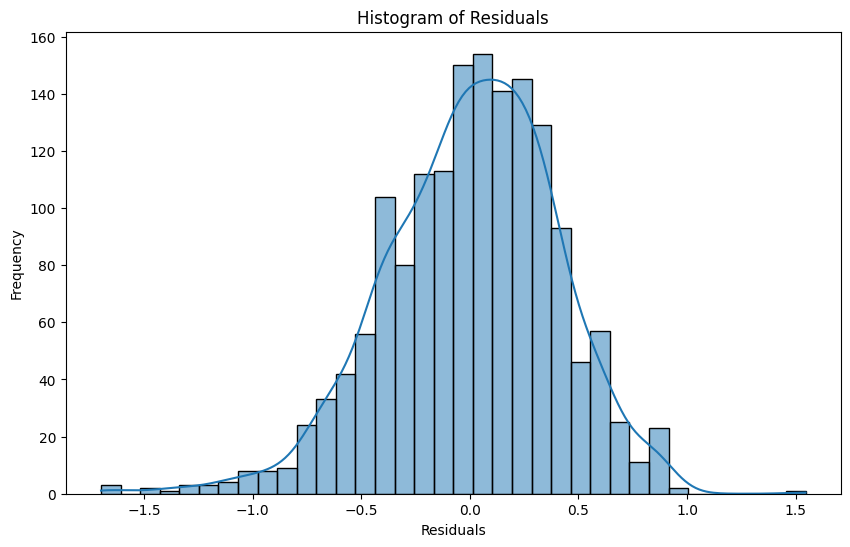

In [95]:
residual_plot(y_test, y_pred_1)

#### NOTE:
* Generate a Q-Q plot to visually assess the normality of residuals. 

In [96]:
# Add Q-Q plot for residual normality
import statsmodels.api as sm
def QQ_plot(y_test, y_pred):
    sm.qqplot(y_test-y_pred, line = "45")
    plt.title('Q-Q plot of Residuals')
    plt.show()

    return

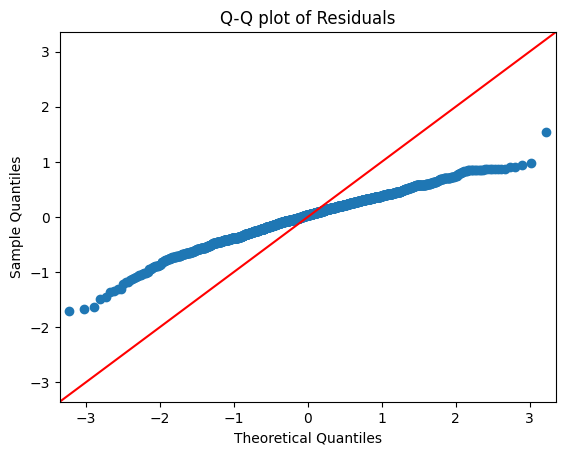

In [97]:
QQ_plot(y_test,y_pred_1)

#### T3.6 Utilize Lime/SHAP libraries, explain the prediction of your regression model and give inferences. (weightage - 4 marks)  (ME)

In [98]:
# !pip install lime
import lime
import lime.lime_tabular

explainer_lime = lime.lime_tabular.LimeTabularExplainer(X,mode="regression",feature_names = X.columns)
sample_idx = 10
sample = X[sample_idx]


lime_exp = explainer_lime.explain_instance(sample,model.predict,num_features = 12)
print("Lime Explaination:")
print(lime_exp.as_list())

InvalidIndexError: (slice(None, None, None), 0)

#### T3.7:Implement the unit test case and deploy a model using Flask / Streamlit. (weightage - 15 marks) (ME)

In [ ]:
import streamlit as st
import joblib
import numpy as np
import requests
import pickle
 
def load_model(url):
    response=requests.get(url)
    file_content=response.content
    data=pickle.loads(file_content)
    return data
 
# Load the trained model
model = load_model("https://github.com/alakhara/Sandbox/raw/main/final_model")
 
st.title('Car Selling Price Predictor')
 
# Input fields
year = st.number_input('Year', min_value=2000, max_value=2024, value=2014)
km_driven = st.number_input('Kilometers Driven', min_value=0, max_value=500000, value=150000)
fuel = st.selectbox('Fuel Type', options=["Diesel","Petorl", "CNG"]) 
seller_type = st.selectbox('Seller Type', options=["individual", "Dealership"])  # Assuming 0-1 are codes for seller types
transmission = st.selectbox('Transmission', options=["Manual", "Automatic"])  # Assuming 0-1 are codes for transmission
owner = st.selectbox('Owner', options=["First Owner", "Second Owner", "Third Owner"])  # Assuming 0-3 are codes for owner types
mileage = st.number_input('Mileage', min_value=0, max_value=5000, value=200)
engine = st.number_input('Engine (CC)', min_value=500, max_value=5000, value=1500)
max_power = st.number_input('Max Power (BHP)', min_value=10, max_value=1000, value=100)
seats = st.number_input('Seats', min_value=2, max_value=10, value=5)
sales_status = st.selectbox('Sales Status', options=["y", "n"])  # Assuming 0-1 are codes for sales status
region_label = st.selectbox('Region Label', options=["West", "North", "South", "Central", "East"])  # Assuming 0-4 are codes for regions
 
# Predict button
if st.button('Predict Selling Price'):
    features = np.array([[year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats, sales_status, region_label]])
    prediction = model.predict(features)
    st.write(f'Predicted Selling Price: {prediction[0]:.2f}')

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 15 marks) (ME)

## Comparing linear regression with other models

Advantages of linear regression:



Disadvantages of linear regression:




### Final Submission guidelines:

* Download the Jupyter notebook in the format of html.
* Upload it in the lumen (UNext LMS)
* Take a screenshot of T3.7 (Deployment) and upload it in the lumen (UNext LMS) 
* Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS)

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------